In [99]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df= pd.read_csv(city_data_to_load)
ridedata_df= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(citydata_df, ridedata_df, on='city')


# Display the data table for preview

combined_data


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [111]:
# Obtain the x and y coordinates for each of the three city type

# Create a group based on the values in the 'city' column
type_group = combined_data.groupby(["city","type"])

# Get the mean of each city as it appears in our group
mean_fare = type_group['fare'].mean()

#Get the number of rides that are unique
ride_counts = type_group['city'].count()

#Total drivers 
total_driver = type_group['driver_count'].mean()

## Bubble Plot of Ride Sharing Data

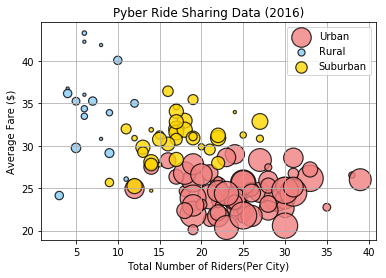

In [112]:
# Incorporate the other graph properties
# Set the xlabel and ylabel using class methods

new_data= pd.DataFrame({"Average Fare": mean_fare, "Ride Counts":ride_counts,"Total driver":total_driver})
new_data= new_data.reset_index()
urban_cities = new_data.loc[new_data["type"] == "Urban",:]
rural_cities = new_data.loc[new_data["type"] == "Rural",:]
suburban_cities =new_data.loc[new_data["type"] == "Suburban",:]


# Build the scatter plots for each city types
# Incorporate a text label regarding circle size

ax = urban_cities.plot(kind= "scatter", x= "Ride Counts", y= "Average Fare", c= 'lightcoral',s = urban_cities["Total driver"]*10, grid = True, label = "Urban", edgecolors="black",alpha =.8,linewidths =1.2, title = "Pyber Ride Sharing Data (2016)")
ax1= rural_cities.plot(kind= "scatter", x= "Ride Counts", y= "Average Fare", c= 'lightskyblue',s = rural_cities["Total driver"]*10, grid = True, label = "Rural", edgecolors="black",alpha =.8,linewidths =1.2, ax=ax)
ax2= suburban_cities.plot(kind= "scatter", x= "Ride Counts", y= "Average Fare", c= 'Gold',s = suburban_cities["Total driver"]*10, grid = True, label = "Suburban", edgecolors="black",alpha =.8,linewidths =1.2, ax=ax)

ax.set_xlabel("Total Number of Riders(Per City)")
ax.set_ylabel("Average Fare ($)")

# Create a legend
ax.legend()

# Put a nicer background color on the legend.



# Save Figure
plt.savefig("Pyber Ride sharing Scatter Plot.png")


In [113]:
# Show plot
plt.show()

## Total Fares by City Type

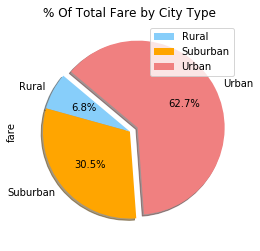

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

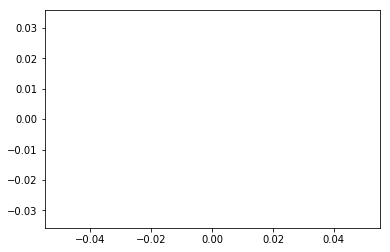

In [114]:
# Calculate Type Percents

city_groups = combined_data.groupby(["type"])

# Create a new variable that holds the sum of our groups
total_fare = city_groups["fare"].sum()
new_df = pd.DataFrame(total_fare)

# Build Pie Chart
colors = ["lightskyblue", "orange", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
fare_pie = new_df.plot(kind="pie", y=new_df.keys(), colors= colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140, title=("% Of Total Fare by City Type"))


# Set the xlabel and ylabel using class methods

plt.show()
plt.tight_layout()
plt.axis("equal")

# Save Figure


In [115]:
# Show Figure
plt.show()

## Total Rides by City Type

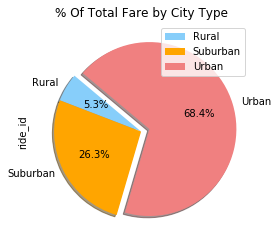

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

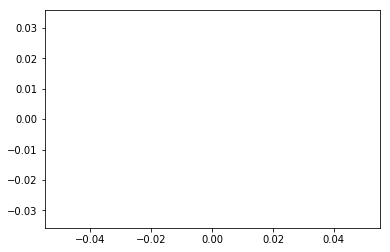

In [116]:
# Calculate Ride Percents

city_groups = combined_data.groupby(["type"])

# Create a new variable that holds the sum of our groups
total_rides= city_groups["ride_id"].count()
new_df = pd.DataFrame(total_rides)

# Build Pie Chart
colors = ["lightskyblue", "orange", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
fare_pie = new_df.plot(kind="pie", y=new_df.keys(), colors= colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140, title=("% Of Total Fare by City Type"))


# Set the xlabel and ylabel using class methods

plt.show()
plt.tight_layout()
plt.axis("equal")

## Total Drivers by City Type

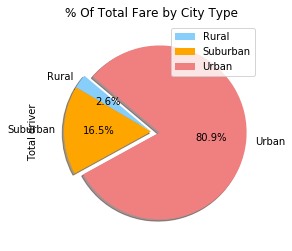

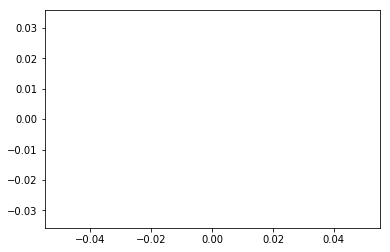

In [134]:
# Calculate Ride Percents
# Set the xlabel and ylabel using class methods

city_groups = new_data.groupby("type")
total_rides = city_groups["Total driver"].sum()

# Create a new variable that holds the sum of our groups
new_df=pd.DataFrame(total_rides)


# Build Pie Chart
colors = ["lightskyblue", "orange", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
fare_pie = new_df.plot(kind="pie", y=new_df.keys(), colors= colors, explode = explode, autopct='%1.1f%%', shadow=True, startangle=140, title=("% Of Total Fare by City Type"))




plt.show()
plt.tight_layout()
plt.axis("equal")

city_groups
